# Importing Libraries and Dataset file

In [1]:
#pip install -U imbalanced-learn

In [11]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import geopandas as gpd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from scipy.stats import spearmanr

In [3]:
#importing of file - mental wellness dataset 
mental_wellness = pd.read_excel('Impact_of_Remote_Work_On_Mental_Health.xlsx',sheet_name=0, usecols=range(20), keep_default_na=False) #use the first sheet and the first 20 columns only
mental_wellness.describe()
print(mental_wellness.columns.tolist())

['Employee_ID', 'Region', 'Age', 'Gender', 'Job_Role', 'Industry', 'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Stress_Level', 'Mental_Health_Condition', 'Access_to_Mental_Health_Resources', 'Productivity_Change', 'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work', 'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality']


# Section 3: Descriptive Statistics (Demographic Analysis)  

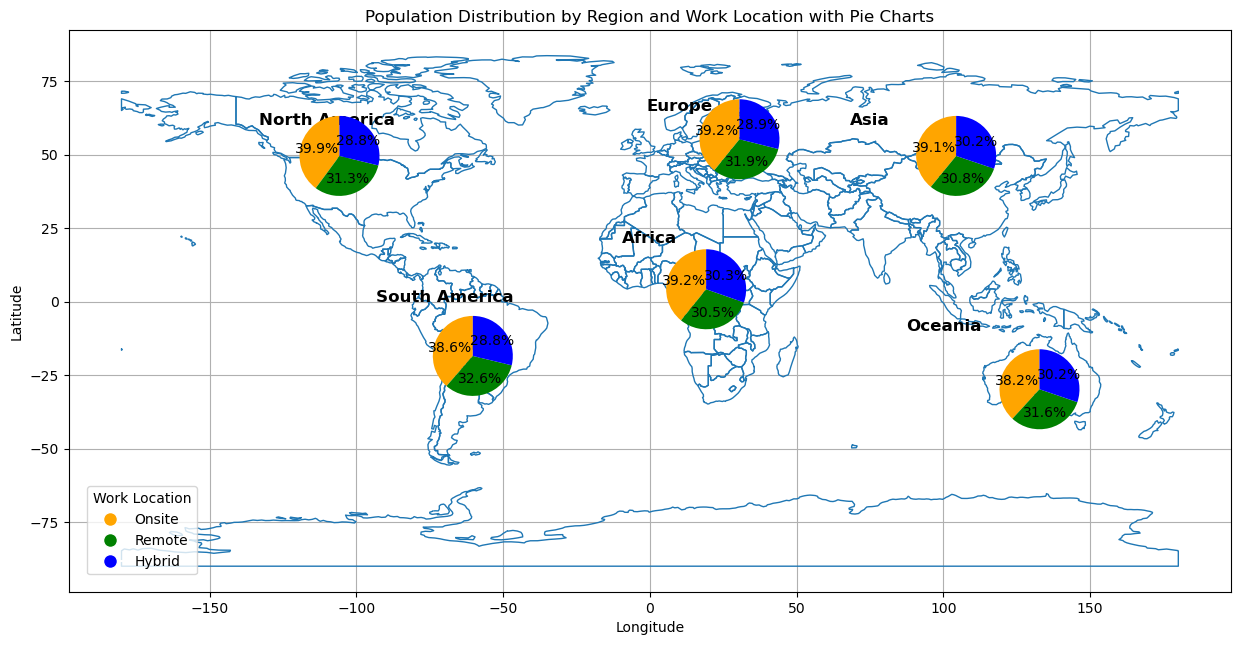

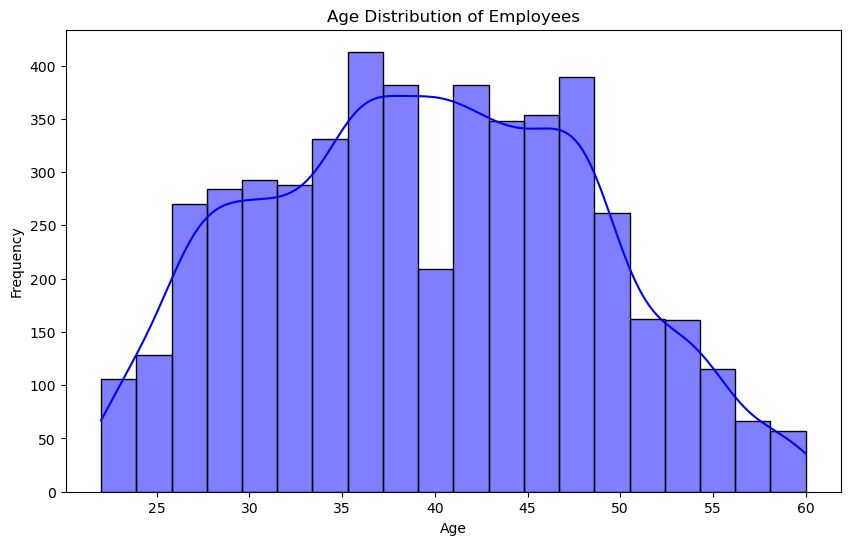

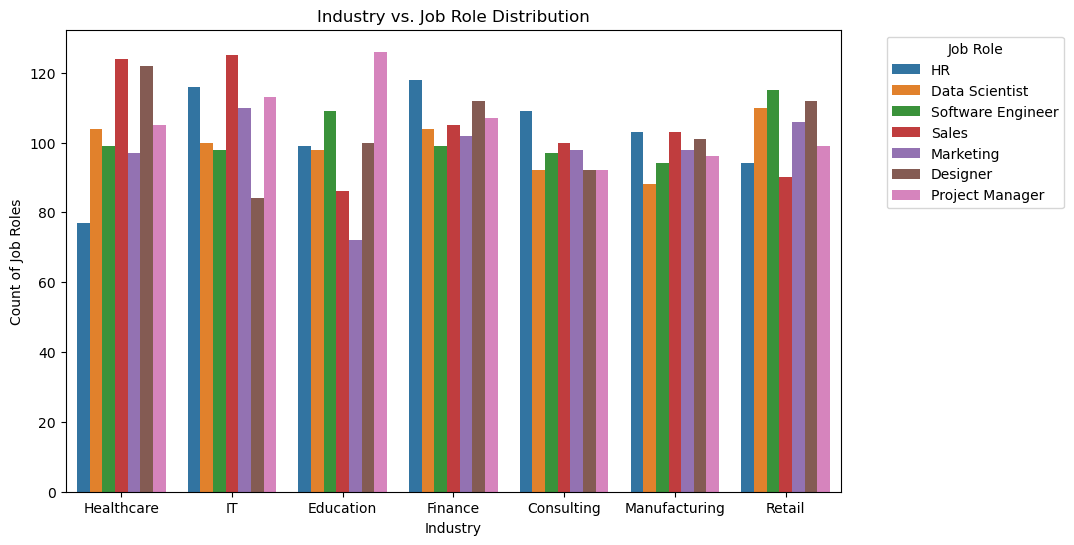

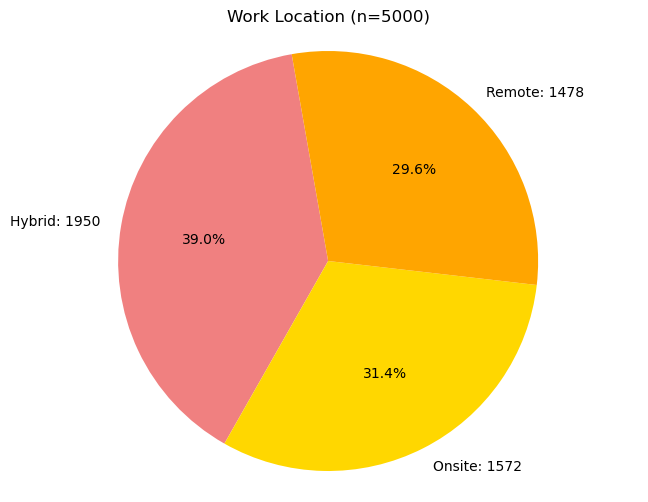

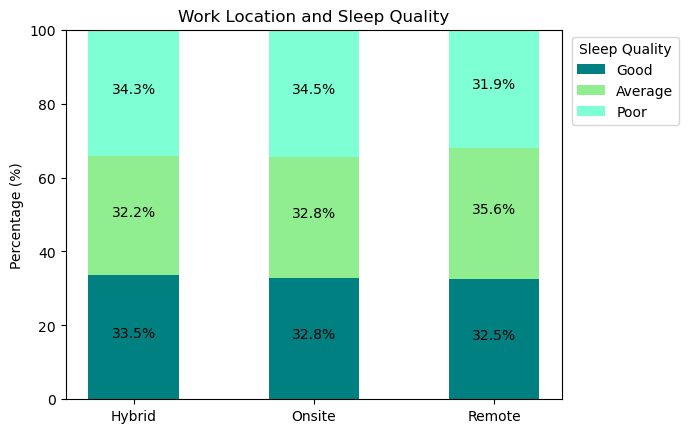

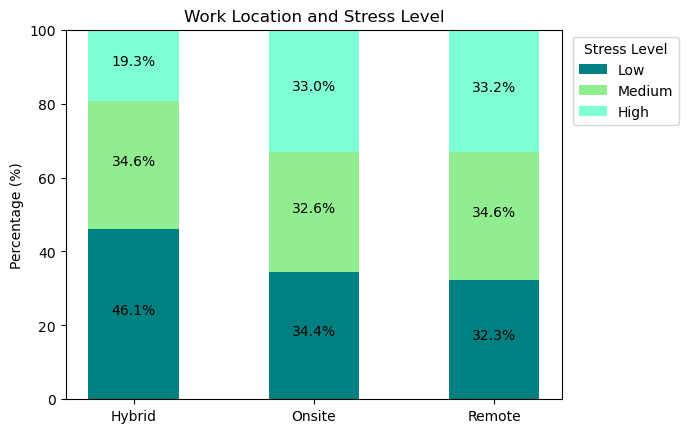

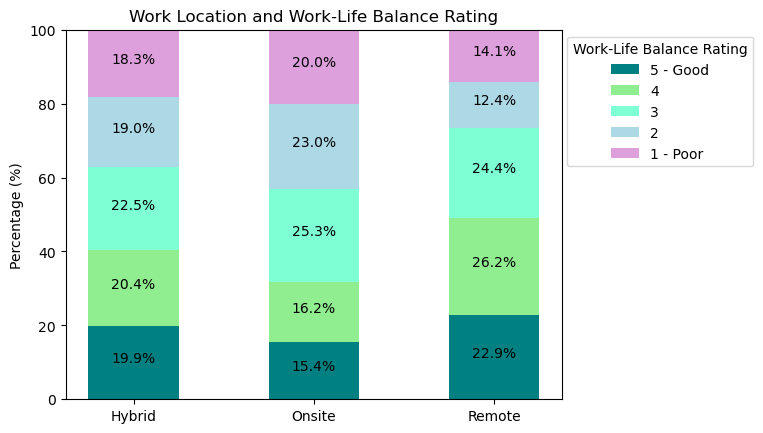

In [4]:
# Figuure 1: Population Distribution by Region and Work Location - Pie charts per region on a global map
location_counts = mental_wellness.groupby(['Region', 'Work_Location']).size().reset_index(name='Counts')
region_counts = location_counts.pivot_table(index='Region', columns='Work_Location', values='Counts', fill_value=0)
region_centers = {'Asia': (75, 60), 'Europe': (10, 65), 'North America': (-110, 60), 'South America': (-70, 0), 'Africa': (0, 20), 'Oceania': (100, -10)}
fig, ax = plt.subplots(figsize=(15, 10))
world = gpd.read_file("ne_110m_admin_0_countries.shp")
world.boundary.plot(ax=ax, linewidth=1)
plt.title('Population Distribution by Region and Work Location with Pie Charts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
legend_labels = ['Onsite', 'Remote', 'Hybrid']
colors = ['orange', 'green', 'blue']
patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, colors)]
plt.legend(handles=patches, title='Work Location', loc='upper left', bbox_to_anchor=(0.01, 0.2))

for region, center in region_centers.items():
    if region in region_counts.index:
        sizes = region_counts.loc[region].values
        pie_ax = fig.add_axes([0, 0, 0, 0], aspect='equal')
        pie_ax.pie(sizes, autopct='%1.1f%%', startangle=90, colors=colors)
        pie_ax.set_position([0.5 + center[0] / 450, 0.4 + center[1] / 300, 0.1, 0.1])
        ax.text(center[0], center[1], region, fontsize=12, fontweight='bold', ha='center')
plt.show()


# Figure 2: Age Distribution Analysis - Histogram for age distribution of surveyed population
plt.figure(figsize=(10, 6))
sns.histplot(mental_wellness['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Figure 3:Industry vs. Job Role Distribution - Count plot for Job Role distribution within each Industry
plt.figure(figsize=(10, 6))
sns.countplot(x='Industry', hue='Job_Role', data=mental_wellness)
plt.title('Industry vs. Job Role Distribution')
plt.xlabel('Industry')
plt.ylabel('Count of Job Roles')
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Figure 4: Work Location Distribution - Pie chart showing work location proportions
labels = ['Hybrid: 1950', 'Onsite: 1572', 'Remote: 1478']
sizes = [39.0, 31.4, 29.6]  # Percentages for each work location
colours = ['lightcoral', 'gold', 'orange']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colours, autopct='%1.1f%%', startangle=100)
plt.title('Work Location (n=5000)')
plt.axis('equal')
plt.show()

# Figure 5: Sleep Quality by Work Location - Stacked bar chart for sleep quality distribution by work location
categories = ['Hybrid', 'Onsite', 'Remote']
values = np.array([[33.5, 32.2, 34.3], [32.8, 32.8, 34.5], [32.5, 35.6, 31.9]])
values_percentage = values / values.sum(axis=1, keepdims=True) * 100
bar_width = 0.5
x = np.arange(len(categories))
bars1 = plt.bar(x, values_percentage[:, 0], width=bar_width, label='Good', color='teal')
bars2 = plt.bar(x, values_percentage[:, 1], width=bar_width, bottom=values_percentage[:, 0], label='Average', color='lightgreen')
bars3 = plt.bar(x, values_percentage[:, 2], width=bar_width, bottom=values_percentage[:, 0] + values_percentage[:, 1], label='Poor', color='aquamarine')

for i in range(len(categories)):
    y1, y2, y3 = bars1[i].get_height(), bars2[i].get_height(), bars3[i].get_height()
    plt.text(x[i], y1 / 2, f'{values_percentage[i, 0]:.1f}%', ha='center')
    plt.text(x[i], y1 + y2 / 2, f'{values_percentage[i, 1]:.1f}%', ha='center')
    plt.text(x[i], y1 + y2 + y3 / 2, f'{values_percentage[i, 2]:.1f}%', ha='center')
plt.ylabel('Percentage (%)')
plt.title('Work Location and Sleep Quality')
plt.xticks(x, categories)
plt.legend(title='Sleep Quality', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.ylim(0, 100)
plt.show()

# Figure 6: Stress Levels by Work Location - Stacked bar chart for stress levels by work location
values = np.array([[46.1, 34.6, 19.3], [34.4, 32.6, 33.0], [32.3, 34.6, 33.2]])
values_percentage = values / values.sum(axis=1, keepdims=True) * 100
bars1 = plt.bar(x, values_percentage[:, 0], width=bar_width, label='Low', color='teal')
bars2 = plt.bar(x, values_percentage[:, 1], width=bar_width, bottom=values_percentage[:, 0], label='Medium', color='lightgreen')
bars3 = plt.bar(x, values_percentage[:, 2], width=bar_width, bottom=values_percentage[:, 0] + values_percentage[:, 1], label='High', color='aquamarine')

for i in range(len(categories)):
    y1, y2, y3 = bars1[i].get_height(), bars2[i].get_height(), bars3[i].get_height()
    plt.text(x[i], y1 / 2, f'{values_percentage[i, 0]:.1f}%', ha='center')
    plt.text(x[i], y1 + y2 / 2, f'{values_percentage[i, 1]:.1f}%', ha='center')
    plt.text(x[i], y1 + y2 + y3 / 2, f'{values_percentage[i, 2]:.1f}%', ha='center')
plt.ylabel('Percentage (%)')
plt.title('Work Location and Stress Level')
plt.xticks(x, categories)
plt.legend(title='Stress Level', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.ylim(0, 100)
plt.show()

# Figure 7: Work-Life Balance Rating by Work Location - Stacked bar chart for work-life balance ratings by work location
values = np.array([[19.9, 20.4, 22.5, 19.0, 18.3], [15.4, 16.2, 25.3, 23.0, 20.0], [22.9, 26.2, 24.4, 12.4, 14.1]])
values_percentage = values / values.sum(axis=1, keepdims=True) * 100
bars1 = plt.bar(x, values_percentage[:, 0], width=bar_width, label='5 - Good', color='teal')
bars2 = plt.bar(x, values_percentage[:, 1], width=bar_width, bottom=values_percentage[:, 0], label='4', color='lightgreen')
bars3 = plt.bar(x, values_percentage[:, 2], width=bar_width, bottom=values_percentage[:, 0] + values_percentage[:, 1], label='3', color='aquamarine')
bars4 = plt.bar(x, values_percentage[:, 3], width=bar_width, bottom=values_percentage[:, 0] + values_percentage[:, 1] + values_percentage[:, 2], label='2', color='lightblue')
bars5 = plt.bar(x, values_percentage[:, 4], width=bar_width, bottom=values_percentage[:, 0] + values_percentage[:, 1] + values_percentage[:, 2] + values_percentage[:, 3], label='1 - Poor', color='plum')

for i in range(len(categories)):
    y1, y2, y3, y4 = bars1[i].get_height(), bars2[i].get_height(), bars3[i].get_height(), bars4[i].get_height()
    plt.text(x[i], y1 / 2, f'{values_percentage[i, 0]:.1f}%', ha='center')
    plt.text(x[i], y1 + y2 / 2, f'{values_percentage[i, 1]:.1f}%', ha='center')
    plt.text(x[i], y1 + y2 + y3 / 2, f'{values_percentage[i, 2]:.1f}%', ha='center')
    plt.text(x[i], y1 + y2 + y3 + y4 / 2, f'{values_percentage[i, 3]:.1f}%', ha='center')
    plt.text(x[i], y1 + y2 + y3 + y4 + bars5[i].get_height() / 2, f'{values_percentage[i, 4]:.1f}%', ha='center')
plt.ylabel('Percentage (%)')
plt.title('Work Location and Work-Life Balance Rating')
plt.xticks(x, categories)
plt.legend(title='Work-Life Balance Rating', loc='upper right', bbox_to_anchor=(1.4, 1))
plt.ylim(0, 100)
plt.show()


# Section 4.1: Analyzing Mental Health Conditions by Work Location using Chi-Square Testing and Standardized Residuals

  Work_Location  Condition  Count  Total_loc  Percentage
0        Hybrid      False    486       1950       24.92
1        Hybrid       True   1464       1950       75.08
2        Onsite      False    342       1572       21.76
3        Onsite       True   1230       1572       78.24
4        Remote      False    304       1478       20.57
5        Remote       True   1174       1478       79.43


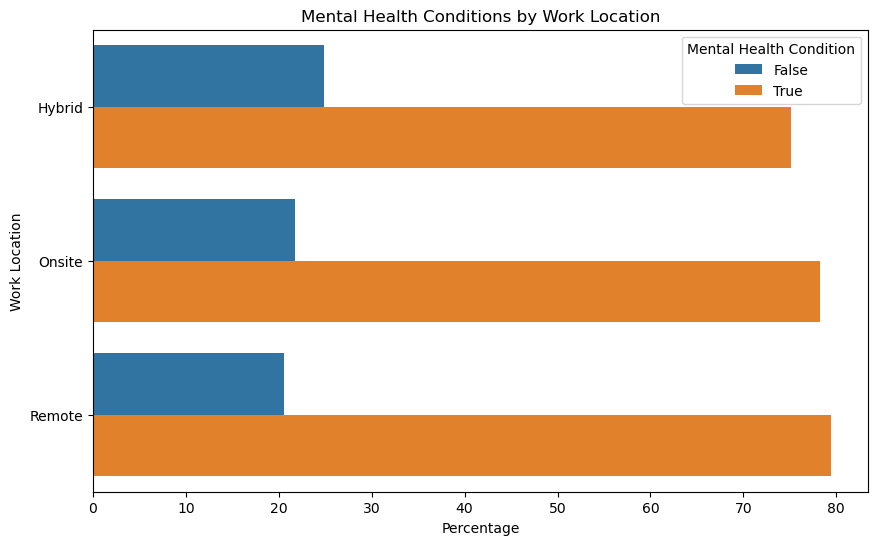

<class 'pandas.core.frame.DataFrame'>
Mental_Health_Condition  Anxiety  Burnout  Depression  None
Work_Location                                              
Hybrid                       501      480         483   486
Onsite                       407      424         399   342
Remote                       403      359         412   304
chi_squared: 14.774263438014593 p-value: 0.0221

Standardized Residuals:
 Mental_Health_Condition   Anxiety   Burnout  Depression      None
Work_Location                                                    
Hybrid                  -0.455074 -0.566371   -0.964182  2.118847
Onsite                  -0.255066  1.350566   -0.388377 -0.736844
Remote                   0.785763 -0.742301    1.508025 -1.673857


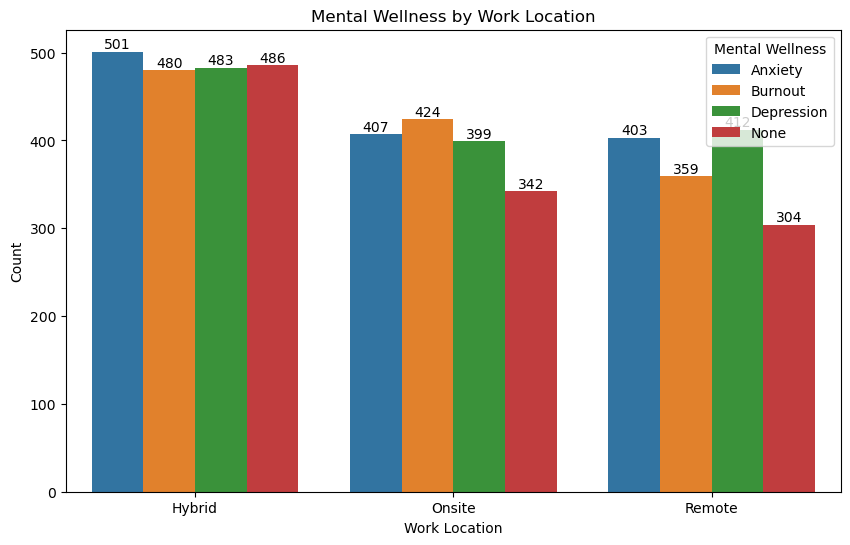

In [5]:
# Calculate the percentage of mental health conditions across different work locations
# We identify individuals with Anxiety, Depression, or Burnout and calculate the percentage for each work location.
mental_wellness['Condition'] = mental_wellness['Mental_Health_Condition'].isin(['Anxiety', 'Depression', 'Burnout'])
grp_loc_condition = mental_wellness.groupby(['Work_Location', 'Condition']).size().reset_index(name='Count')
grp_location_only = mental_wellness.groupby(['Work_Location']).size().reset_index(name='Total_loc')
grp_loc_condition = grp_loc_condition.merge(grp_location_only[['Work_Location', 'Total_loc']], on='Work_Location')
grp_loc_condition['Percentage'] = round(grp_loc_condition['Count'] / grp_loc_condition['Total_loc'] * 100, 2)
print(grp_loc_condition)

#Figure 9: Visualization: Bar plot of mental health conditions by work location
plt.figure(figsize=(10, 6))
sns.barplot(data=grp_loc_condition, y='Work_Location', x='Percentage', hue='Condition', orient='h')
plt.title('Mental Health Conditions by Work Location')
plt.xlabel('Percentage')
plt.ylabel('Work Location')
plt.legend(title='Mental Health Condition')
plt.show()

# Perform Chi-Square Test to analyze association between work location and mental health conditions
# We create a contingency table and perform a Chi-Square test to evaluate if the work location influences mental health.
count_table = pd.crosstab(mental_wellness['Work_Location'], mental_wellness['Mental_Health_Condition'])
print(type(count_table))
print(count_table)

# Chi-Square Test results: Checking statistical significance
chi_squared, p, dof, expected = stats.chi2_contingency(count_table, correction=False)
print('chi_squared:', chi_squared, 'p-value:', round(p, 4))

# Standardized Residuals: Calculate and display standardized residuals to identify significant deviations in expected counts
standardized_residuals = (count_table - expected) / np.sqrt(expected)
print("\nStandardized Residuals:\n", standardized_residuals)
grp_loc_mh = mental_wellness.groupby(['Work_Location', 'Mental_Health_Condition']).size().reset_index(name='Count')

# Figure 10: Visualization:  grouped bar chart for mental wellness by work location 
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=grp_loc_mh, x='Work_Location', y='Count', hue='Mental_Health_Condition')
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

plt.title('Mental Wellness by Work Location')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.legend(title='Mental Wellness')
plt.show()




# Section 4.1.2: Analyzing Productivity Changes by Work Location using Chi-Square Testing and Standardized Residuals

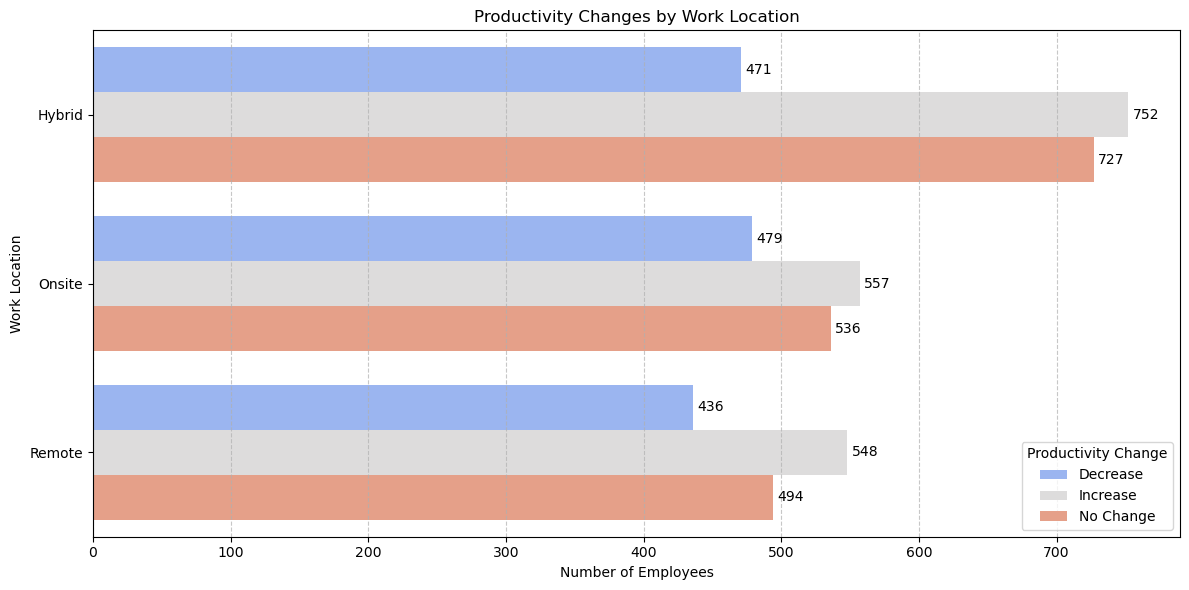

<class 'pandas.core.frame.DataFrame'>
Productivity_Change  Decrease  Increase  No Change
Work_Location                                     
Hybrid                    471       752        727
Onsite                    479       557        536
Remote                    436       548        494
chi_squared: 21.497991547784842 p-value: 0.0003

Standardized Residuals:
 Productivity_Change  Decrease  Increase  No Change
Work_Location                                     
Hybrid              -2.991030  1.031900   1.595682
Onsite               2.071471 -1.110832  -0.697811
Remote               1.299258 -0.039660  -1.113188


In [6]:
# Create a contingency table to summarize the counts of productivity changes by work location
count_table = pd.crosstab(mental_wellness['Work_Location'], mental_wellness['Productivity_Change'])

# Figure 11: isualization: Grouped bar chart to display the number of employees experiencing different productivity changes across work locations
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=count_table.stack().reset_index(name='Count'), 
                 x='Count', y='Work_Location', hue='Productivity_Change', orient='h', palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title('Productivity Changes by Work Location')
plt.xlabel('Number of Employees')
plt.ylabel('Work Location')
plt.legend(title='Productivity Change')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Perform a Chi-Square Test to analyze the association between work location and productivity changes
# Creating a contingency table to check if there is a significant association between work location and productivity changes
print(type(count_table))
print(count_table)

# Chi-Square Test results: Checking statistical significance
chi_squared, p, dof, expected = stats.chi2_contingency(count_table, correction=False)
print('chi_squared:', chi_squared, 'p-value:', round(p, 4))

# Calculate standardized residuals to identify significant deviations in expected counts
standardized_residuals = (count_table - expected) / np.sqrt(expected)
print("\nStandardized Residuals:\n", standardized_residuals)

# Section 4.2: Analyzing Mental Health Conditions and Productivity by Region and Industry¶

Productivity_Change  Decrease  Increase  No Change
Region                                            
Africa                     73       132        132
Asia                       89       109        126
Europe                     81       125        123
North America              79       114        117
Oceania                    79       126        126
South America              70       146        103
chi_squared: 12.673962080356091 p-value: 0.2425

Standardized Residuals:
 Productivity_Change  Decrease  Increase  No Change
Region                                            
Africa              -0.930876  0.178857   0.567358
Asia                 1.214230 -1.426704   0.473690
Europe               0.172064 -0.166540   0.030885
North America        0.476483 -0.507481   0.132611
Oceania             -0.106161 -0.145793   0.233727
South America       -0.803245  2.071919  -1.460708


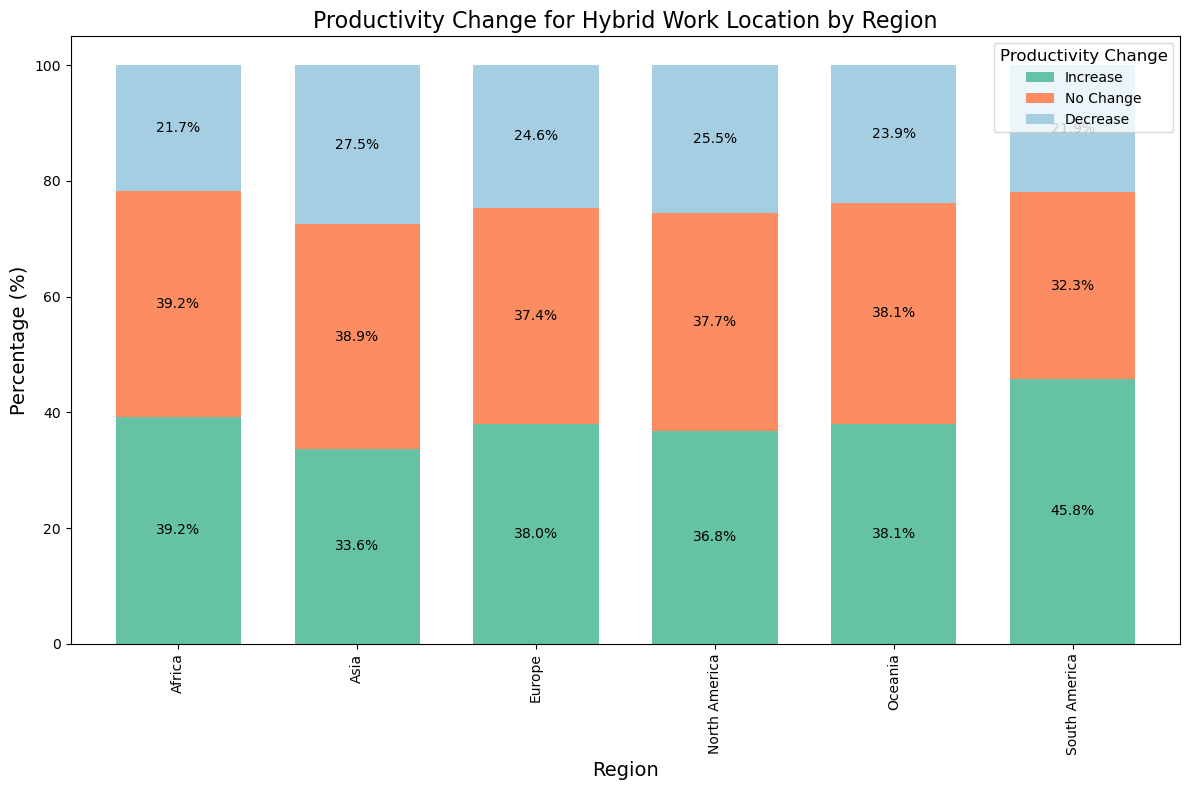

Productivity_Change  Decrease  Increase  No Change
Industry                                          
Consulting                 54        90         90
Education                  52        80         80
Finance                    59       127         91
Healthcare                 69       100         78
IT                         61       105        100
Manufacturing              84       131        126
Retail                     92       119        162
chi_squared: 18.70696841958856 p-value: 0.0958

Standardized Residuals:
 Productivity_Change  Decrease  Increase  No Change
Industry                                          
Consulting          -0.335196 -0.025265   0.295496
Education            0.110937 -0.194196   0.108213
Finance             -0.966568  1.952246  -1.207536
Healthcare           1.209220  0.486350  -1.467945
IT                  -0.405365  0.238886   0.083321
Manufacturing        0.180198 -0.043915  -0.100378
Retail               0.200822 -2.071463   1.945137


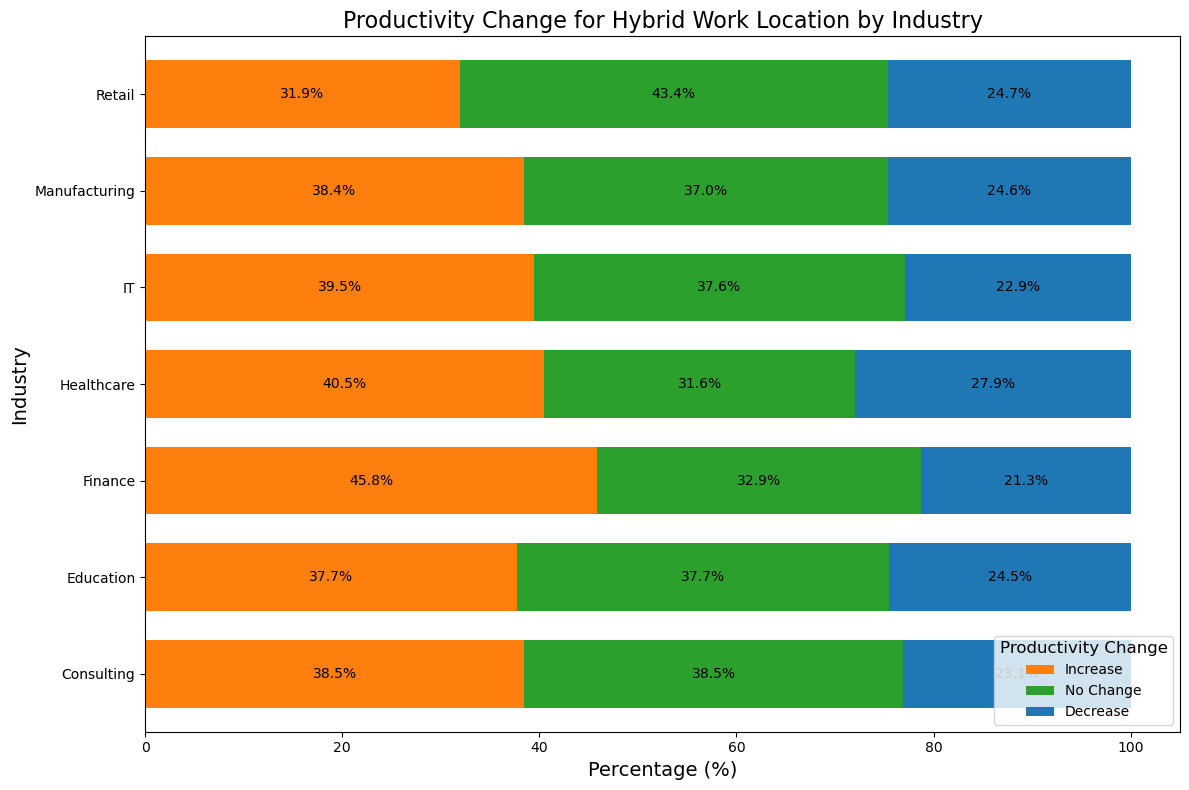

In [7]:
# Section 4.2, Part 1: Mental Health Condition by Region

# Create a contingency table to summarize the counts of hybrid employee by region
hybrid_employees = mental_wellness[mental_wellness['Work_Location'] == 'Hybrid']
count_table_hybrid_productivity = pd.crosstab(hybrid_employees['Region'], hybrid_employees['Productivity_Change'])
print(count_table_hybrid_productivity)

# Chi-Square Test results: Checking statistical significance
chi_squared, p, dof, expected = stats.chi2_contingency(count_table_hybrid_productivity, correction=False)
print('chi_squared:', chi_squared, 'p-value:', round(p, 4))

standardized_residuals = (count_table_hybrid_productivity - expected) / np.sqrt(expected)
print("\nStandardized Residuals:\n", standardized_residuals)

# Figure 12: Visualization: stacked bar chart to display productivity change by work location and region 
region_productivity_counts = hybrid_employees.groupby(['Region', 'Productivity_Change']).size().unstack().fillna(0)
region_productivity_percentage = region_productivity_counts.div(region_productivity_counts.sum(axis=1), axis=0) * 100
region_productivity_percentage = region_productivity_percentage[['Increase', 'No Change', 'Decrease']]

fig, ax = plt.subplots(figsize=(12, 8))
region_productivity_percentage.plot(kind="bar", stacked=True, color=['#66c2a5', '#fc8d62', '#a6cee3'], width=0.7, ax=ax)
plt.title("Productivity Change for Hybrid Work Location by Region", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.legend(title="Productivity Change", loc="upper right", title_fontsize=12, fontsize=10)

for i, region in enumerate(region_productivity_percentage.index):
    cumulative_percentage = 0  # Track cumulative percentage to position labels correctly
    for j, change_type in enumerate(region_productivity_percentage.columns):
        percentage = region_productivity_percentage.loc[region, change_type]
        if percentage > 0:  # Only label non-zero values
            # Add label at the center of each stacked bar segment with black color and increased font size
            ax.text(i, cumulative_percentage + percentage / 2, f"{percentage:.1f}%", ha='center', va='center', fontsize=10, color='black')
            cumulative_percentage += percentage  # Update cumulative percentage for next segment

plt.tight_layout()
plt.show()


# Section 4c, Part 2: Productivity Change by Industry

# Create a contingency table to summarize the counts of hybrid employee by industry
hybrid_employees = mental_wellness[mental_wellness['Work_Location'] == 'Hybrid']
count_table_hybrid_productivity = pd.crosstab(hybrid_employees['Industry'], hybrid_employees['Productivity_Change'])
print(count_table_hybrid_productivity)

# Chi-Square Test results: Checking statistical significance
chi_squared, p, dof, expected = stats.chi2_contingency(count_table_hybrid_productivity, correction=False)
print('chi_squared:', chi_squared, 'p-value:', round(p, 4))

standardized_residuals = (count_table_hybrid_productivity - expected) / np.sqrt(expected)
print("\nStandardized Residuals:\n", standardized_residuals)


# Figure 13: Visualization: stacked bar chart to display productivity change by work location and industry
industry_productivity_counts = hybrid_employees.groupby(['Industry', 'Productivity_Change']).size().unstack().fillna(0)
industry_productivity_percentage = industry_productivity_counts.div(industry_productivity_counts.sum(axis=1), axis=0) * 100
industry_productivity_percentage = industry_productivity_percentage[['Increase', 'No Change', 'Decrease']]

fig, ax = plt.subplots(figsize=(12, 8))
industry_productivity_percentage.plot(kind="barh", stacked=True, color=['#ff7f0e', '#2ca02c' ,'#1f77b4'], width=0.7, ax=ax)
plt.title("Productivity Change for Hybrid Work Location by Industry", fontsize=16)
plt.xlabel("Percentage (%)", fontsize=14)
plt.ylabel("Industry", fontsize=14)
plt.legend(title="Productivity Change", loc="lower right", title_fontsize=12, fontsize=10)

for i, industry in enumerate(industry_productivity_percentage.index):
    cumulative_percentage = 0  # Track cumulative percentage to position labels correctly
    for j, change_type in enumerate(industry_productivity_percentage.columns):
        percentage = industry_productivity_percentage.loc[industry, change_type]
        if percentage > 0:  # Only label non-zero values
            # Add label at the center of each stacked bar segment with black color and increased font size
            ax.text(cumulative_percentage + percentage / 2, i, f"{percentage:.1f}%", ha='center', va='center', fontsize=10, color='black')
            cumulative_percentage += percentage  # Update cumulative percentage for next segment

plt.tight_layout()
plt.show()


# Section 4.3: Analyzing Productivity Changes by Work Location using Chi-Square Testing and Standardized Residuals

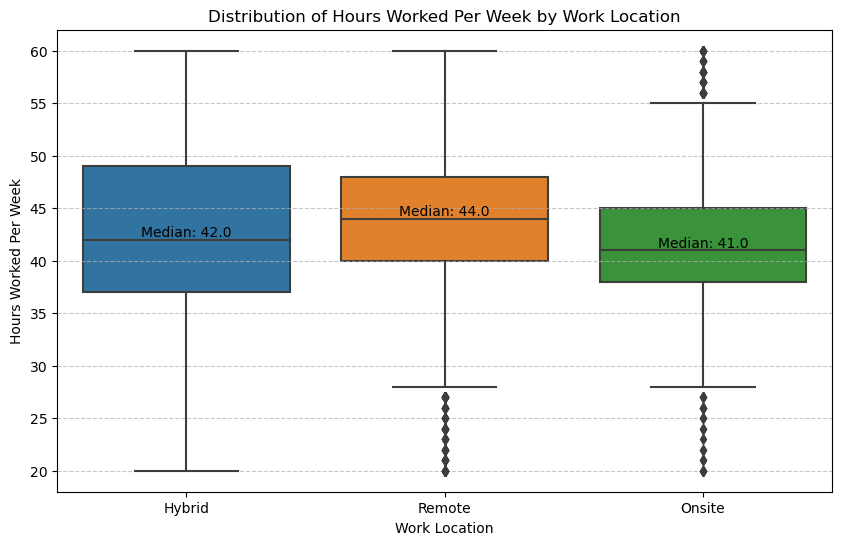

Mean Hours Worked Per Week by Work Location:
 Work_Location
Hybrid    42.212821
Onsite    41.706743
Remote    43.327470
Name: Hours_Worked_Per_Week, dtype: float64
F-statistic: 15.957701808119813
p-value: 1.235082928998774e-07

Tukey's HSD Test for Hours Worked by Work Location
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Hybrid Onsite  -0.5061 0.1557 -1.1497 0.1376  False
Hybrid Remote   1.1146 0.0002  0.4598 1.7695   True
Onsite Remote   1.6207    0.0  0.9327 2.3087   True
---------------------------------------------------


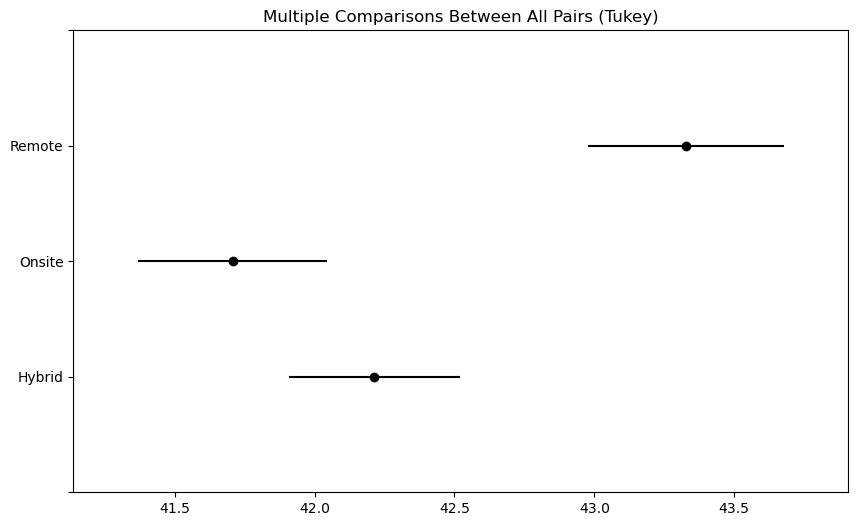

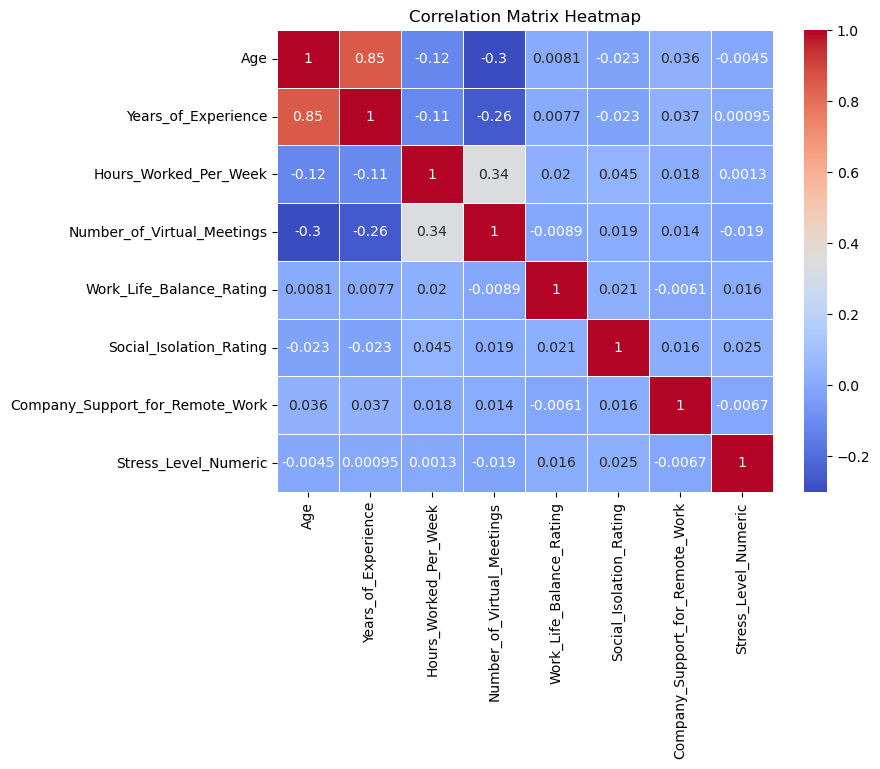


Analysis of Number of Working Hours by Work Location
-------------------------------------------------------
Mean Difference (Remote - Non-Remote): 1.34 meetings
Standard Error of the Difference:      0.25 meetings
Z-Value:                               5.41
95% Confidence Interval:               (0.86, 1.83)
P-Value:                               0.0000

Analysis of Number of Virtual Meetings by Work Location
-------------------------------------------------------
Mean Difference (Remote - Non-Remote): 0.26 meetings
Standard Error of the Difference:      0.17 meetings
Z-Value:                               1.55
95% Confidence Interval:               (-0.07, 0.59)
P-Value:                               0.0609
0.5130586572438176
0.5130586572438176 0.2683252656896468
confidence interval (-0.012849199650031173, 1.0389665141376665)
p-value 0.027933138142279927
6132
Comparison of Hours Worked Per Week: Mental Conditions Issue vs. No Issue
---------------------------------------------------

In [14]:
# Section 4.3: Analyzing Mean Hours Worked Per Week by Work Location using ANOVA and Tukey's HSD Test


# Figure 14: Visualization: Box plot to display the distribution of hours worked per week across different work locations
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='Work_Location', y='Hours_Worked_Per_Week', data=mental_wellness)

work_locations = mental_wellness['Work_Location'].unique()

for i, location in enumerate(work_locations):
    # Median for each work location
    median = mental_wellness[mental_wellness['Work_Location'] == location]['Hours_Worked_Per_Week'].median()
    plt.text(i, median, f'Median: {median}', ha='center', va='bottom', color='black')

    # Calculate IQR for the current location
    q1 = mental_wellness[mental_wellness['Work_Location'] == location]['Hours_Worked_Per_Week'].quantile(0.25)
    q3 = mental_wellness[mental_wellness['Work_Location'] == location]['Hours_Worked_Per_Week'].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    # Find outliers for the current work location
    outliers = mental_wellness[(mental_wellness['Work_Location'] == location) & 
                              (mental_wellness['Hours_Worked_Per_Week'] > upper_whisker)]
    
plt.title('Distribution of Hours Worked Per Week by Work Location')
plt.xlabel('Work Location')
plt.ylabel('Hours Worked Per Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the mean hours worked per week 
mean_work_hours = mental_wellness.groupby('Work_Location')['Hours_Worked_Per_Week'].mean()
print("Mean Hours Worked Per Week by Work Location:\n", mean_work_hours)


# Perform ANOVA to compare the average hours worked across different work locations
# We filter the relevant columns and remove any missing values before performing ANOVA
work_hours_df = mental_wellness[['Work_Location', 'Hours_Worked_Per_Week']].dropna()
anova_result = stats.f_oneway(
    work_hours_df[work_hours_df['Work_Location'] == 'Hybrid']['Hours_Worked_Per_Week'],
    work_hours_df[work_hours_df['Work_Location'] == 'Onsite']['Hours_Worked_Per_Week'],
    work_hours_df[work_hours_df['Work_Location'] == 'Remote']['Hours_Worked_Per_Week']
)
print(f"F-statistic: {anova_result.statistic}")
print(f"p-value: {anova_result.pvalue}")

# Perform Tukey's HSD Test to identify specific group differences in average work hours
tukey_result = pairwise_tukeyhsd(
    endog=work_hours_df['Hours_Worked_Per_Week'],  # Dependent variable
    groups=work_hours_df['Work_Location'],  # Grouping variable
    alpha=0.05  # Significance level
)
print("\nTukey's HSD Test for Hours Worked by Work Location")
print(tukey_result)

# Display the Tukey HSD plot 
tukey_result.plot_simultaneous()
plt.show()  

# Figure 8: Correlation Analysis - Heatmap of correlation matrix for numerical variables
corr_matrix = mental_wellness.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Analysis of Number of working hours by Work Location

# Separate data by work location for number of virtual meetings
non_remote_meetings = mental_wellness[mental_wellness['Work_Location'] != 'Remote']['Hours_Worked_Per_Week']
remote_meetings = mental_wellness[mental_wellness['Work_Location'] == 'Remote']['Hours_Worked_Per_Week']

# Calculate mean difference, standard error, and z-value for number of working hours
remote_nonremote_mean_meetings = np.mean(remote_meetings) - np.mean(non_remote_meetings)
remote_nonremote_std_meetings = np.sqrt(np.var(remote_meetings, ddof=1) / len(remote_meetings) + 
                                        np.var(non_remote_meetings, ddof=1) / len(non_remote_meetings))
z_value_meetings = remote_nonremote_mean_meetings / remote_nonremote_std_meetings

# Calculate confidence interval and p-value for virtual meetings
conf_interval_meetings = stats.norm(remote_nonremote_mean_meetings, remote_nonremote_std_meetings).interval(0.95)
p_value_meetings = stats.norm.sf(z_value_meetings)

# Print results for virtual meetings analysis
print("\nAnalysis of Number of Working Hours by Work Location")
print("-------------------------------------------------------")
print(f"Mean Difference (Remote - Non-Remote): {remote_nonremote_mean_meetings:.2f} meetings")
print(f"Standard Error of the Difference:      {remote_nonremote_std_meetings:.2f} meetings")
print(f"Z-Value:                               {z_value_meetings:.2f}")
print(f"95% Confidence Interval:               ({conf_interval_meetings[0]:.2f}, {conf_interval_meetings[1]:.2f})")
print(f"P-Value:                               {p_value_meetings:.4f}")


# Analysis of Number of Virtual Meetings by Work Location

# Separate data by work location for number of virtual meetings
non_remote_meetings = mental_wellness[mental_wellness['Work_Location'] != 'Remote']['Number_of_Virtual_Meetings']
remote_meetings = mental_wellness[mental_wellness['Work_Location'] == 'Remote']['Number_of_Virtual_Meetings']

# Calculate mean difference, standard error, and z-value for virtual meetings
remote_nonremote_mean_meetings = np.mean(remote_meetings) - np.mean(non_remote_meetings)
remote_nonremote_std_meetings = np.sqrt(np.var(remote_meetings, ddof=1) / len(remote_meetings) + 
                                        np.var(non_remote_meetings, ddof=1) / len(non_remote_meetings))
z_value_meetings = remote_nonremote_mean_meetings / remote_nonremote_std_meetings

# Calculate confidence interval and p-value for virtual meetings
conf_interval_meetings = stats.norm(remote_nonremote_mean_meetings, remote_nonremote_std_meetings).interval(0.95)
p_value_meetings = stats.norm.sf(z_value_meetings)

# Print results for virtual meetings analysis
print("\nAnalysis of Number of Virtual Meetings by Work Location")
print("-------------------------------------------------------")
print(f"Mean Difference (Remote - Non-Remote): {remote_nonremote_mean_meetings:.2f} meetings")
print(f"Standard Error of the Difference:      {remote_nonremote_std_meetings:.2f} meetings")
print(f"Z-Value:                               {z_value_meetings:.2f}")
print(f"95% Confidence Interval:               ({conf_interval_meetings[0]:.2f}, {conf_interval_meetings[1]:.2f})")
print(f"P-Value:                               {p_value_meetings:.4f}")


Issue = mental_wellness[mental_wellness['Mental_Health_Condition'] != 'No Issue']['Hours_Worked_Per_Week']
No_Issue = mental_wellness[mental_wellness['Mental_Health_Condition'] == 'None']['Hours_Worked_Per_Week']

#no population variance and varaince between remote and no remote is different 

issue_nonissue_mean = np.mean(Issue) - np.mean(No_Issue)
print(issue_nonissue_mean)
issue_nonissue_std = np.sqrt(np.var(Issue,ddof=1)/len(Issue)+np.var(No_Issue,ddof=1)/len(No_Issue))
z_value = issue_nonissue_mean/issue_nonissue_std
print(issue_nonissue_mean, issue_nonissue_std)

print('confidence interval',stats.norm(issue_nonissue_mean, issue_nonissue_std).interval(.95))
print('p-value',stats.norm.sf(z_value))
print(len(Issue)+len(No_Issue))

# Separate data based on mental health condition
Issue = mental_wellness[mental_wellness['Mental_Health_Condition'] != 'None']['Hours_Worked_Per_Week']
No_Issue = mental_wellness[mental_wellness['Mental_Health_Condition'] == 'None']['Hours_Worked_Per_Week']

# Check if both groups have data
if len(Issue) > 0 and len(No_Issue) > 0:
    # Calculate mean difference and standard error
    issue_nonissue_mean = np.mean(Issue) - np.mean(No_Issue)
    issue_nonissue_std = np.sqrt(np.var(Issue, ddof=1) / len(Issue) + np.var(No_Issue, ddof=1) / len(No_Issue))
    z_value = issue_nonissue_mean / issue_nonissue_std

    # Calculate 95% confidence interval
    conf_interval = (issue_nonissue_mean - 1.96 * issue_nonissue_std, 
                     issue_nonissue_mean + 1.96 * issue_nonissue_std)

    # Two-tailed p-value
    p_value = stats.norm.sf(abs(z_value)) * 2

    # Display results in a formatted style
    print("Comparison of Hours Worked Per Week: Mental Conditions Issue vs. No Issue")
    print("-------------------------------------------------------")
    print(f"Mean Difference (Issue - No Issue): {issue_nonissue_mean:.2f} hours")
    print(f"Standard Error of the Difference:   {issue_nonissue_std:.2f} hours")
    print(f"Z-Value:                            {z_value:.2f}")
    print(f"95% Confidence Interval:            ({conf_interval[0]:.2f}, {conf_interval[1]:.2f})")
    print(f"P-Value:                            {p_value:.4f}")
    
    
# Calculate Spearman correlation
spearman_corr, spearman_p_value = spearmanr(mental_wellness['Stress_Level'], mental_wellness['Hours_Worked_Per_Week'])

# Print the results in a nicer format
print("Spearman Correlation Analysis")
print("-----------------------------")
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print(f"P-value:                         {spearman_p_value:.4f}")


# Section 4.4: Predicting mental condition using logistics regression 

Cross-validation scores: [0.65276596 0.64978723 0.63276596 0.63617021 0.65617021]
Mean cross-validation score: 0.6455319148936169

Classification Report:
              precision    recall  f1-score   support

         0.0       0.40      0.57      0.47       283
         1.0       0.86      0.75      0.80       967

    accuracy                           0.71      1250
   macro avg       0.63      0.66      0.63      1250
weighted avg       0.75      0.71      0.72      1250


Confusion Matrix:


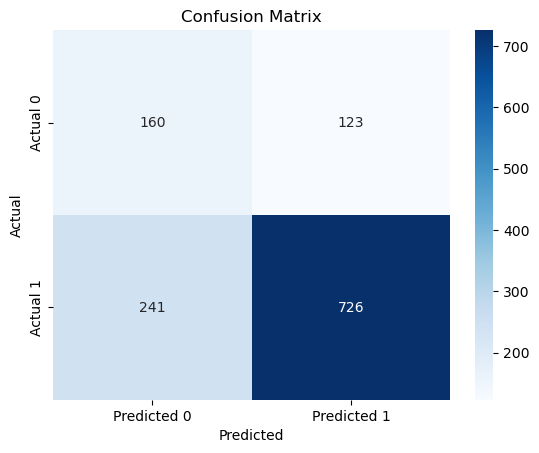


Feature Importance:
                         Feature  Importance
1           Work_Location_Onsite    0.052436
2           Work_Location_Remote    0.047658
0          Hours_Worked_Per_Week    0.011207
6  Productivity_Change_No Change   -0.373734
5   Productivity_Change_Increase   -0.501599
4            Stress_Level_Medium   -1.053102
3               Stress_Level_Low   -1.981304
Intercept: [1.1109767]


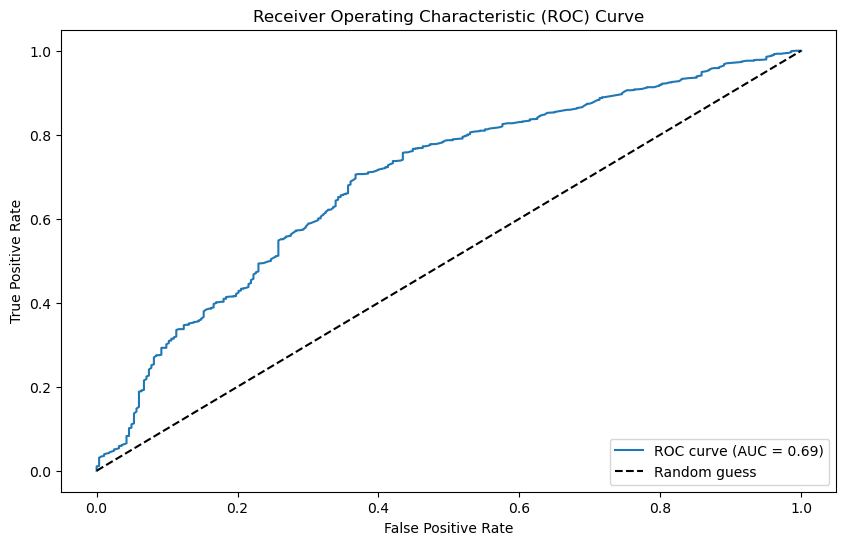

In [9]:
mental_wellness.loc[mental_wellness['Mental_Health_Condition'] == 'Burnout', 'Mental_Health_Issue'] = 1
mental_wellness.loc[mental_wellness['Mental_Health_Condition'] == 'Depression', 'Mental_Health_Issue'] = 1
mental_wellness.loc[mental_wellness['Mental_Health_Condition'] == 'Anxiety', 'Mental_Health_Issue'] = 1
mental_wellness.loc[mental_wellness['Mental_Health_Condition'] == 'None', 'Mental_Health_Issue'] = 0

X = mental_wellness[['Work_Location', 'Stress_Level', 'Productivity_Change', 'Hours_Worked_Per_Week']]
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded = X_encoded.astype(float)
y = mental_wellness['Mental_Health_Issue']

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42, stratify=y)

smote = SMOTE(sampling_strategy={0: 8000, 1: 3750}, random_state=42, k_neighbors=3)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_res, y_train_res)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=skf)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

y_prob = model.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred = (y_prob >= threshold).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

feature_importance = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)
print("Intercept:", model.intercept_)

roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()